In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

%matplotlib inline

In [2]:
tgas = Table.read("/Users/arc/research/catalogs/gaia_dr1_tgas.fits")

In [71]:
import scipy.optimize as op

function = lambda x, *p: np.polyval(p, x)

finite = np.isfinite(tgas["astrometric_weight_al"]) \
       * np.isfinite(tgas["astrometric_excess_noise"]) \
       * (tgas["astrometric_excess_noise"] > 0)
    
x = tgas["astrometric_weight_al"][finite]
y = tgas["astrometric_excess_noise"][finite]
p_opt, p_cov = op.curve_fit(function, x, y, p0=[0.10, 0], )

/Users/arc/anaconda2/envs/py3/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [69]:
p_opt, p_cov

(array([0.00836051, 0.07215764]), array([[inf, inf],
        [inf, inf]]))

(0.004866765, 28.450281)

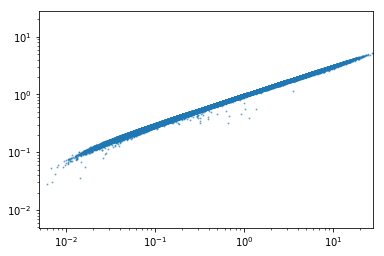

In [45]:
xi = np.array([x.min(), x.max()])
yi = np.polyval(p_opt, xi)

fig, ax = plt.subplots()
ax.scatter(x, y, s=1, alpha=0.5)
ax.plot(xi, yi, c='r', zorder=100)
ax.semilogx()
ax.semilogy()
ax.set_xlim(xi)
ax.set_ylim(xi)

(-1.6771739427101993, 3.3130271393594426)

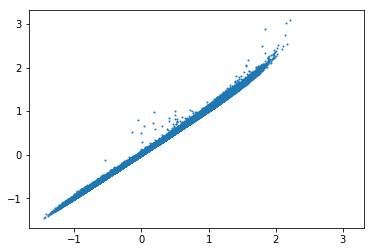

In [72]:
fig, ax = plt.subplots()
ax.scatter(np.log10(x), -2*np.log10(y), s=1)
#ax.semilogx()
#ax.semilogy()

limits = np.hstack([ax.get_xlim(), ax.get_ylim()])
limits = [limits.min(), limits.max()]
ax.set_xlim(limits)
ax.set_ylim(limits)

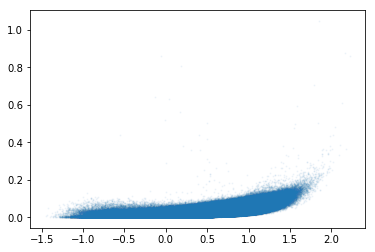

In [74]:
fig, ax = plt.subplots()
ax.scatter(np.log10(x), -2*np.log10(y) - np.log10(x),
           s=1, alpha=0.05)

In [75]:
#-2 * np.log10(y) - np.log10(x) > 0
#-2 * np.log10(aen) - np.log10(weight) > 0


4.860573371057164e-05

In [83]:
a = -2 * np.log10(y)
b = np.log10(y**-2)

assert np.all(np.log10(1.0/(y**2 * x)) > 0)

In [86]:
np.all((x*y**2) < 1.0)
#y = np.sqrt(1.0/x)
# y ~ x**-0.5

True

(6.937452066252118, 0.021367427673004327)

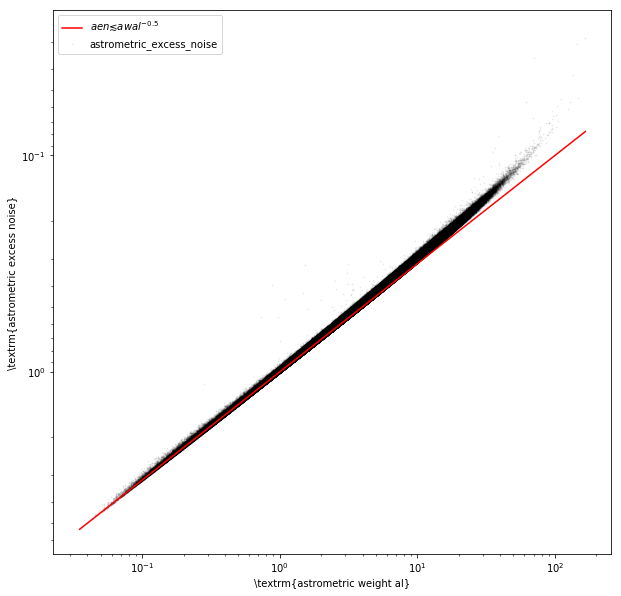

In [91]:
xi = np.linspace(np.min(x), np.max(x), 100)
yi = xi**-0.5

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x, y, s=1, facecolor="k", alpha=0.05)
ax.plot(xi, yi, c='r', label=r"$aen \lesssim awal^{-0.5}$")
ax.semilogx()
ax.semilogy()
ax.set_xlabel(r"\textrm{astrometric weight al}")
ax.set_ylabel(r"\textrm{astrometric excess noise}")

plt.legend()
ax.set_ylim(ax.get_ylim()[::-1])

[]

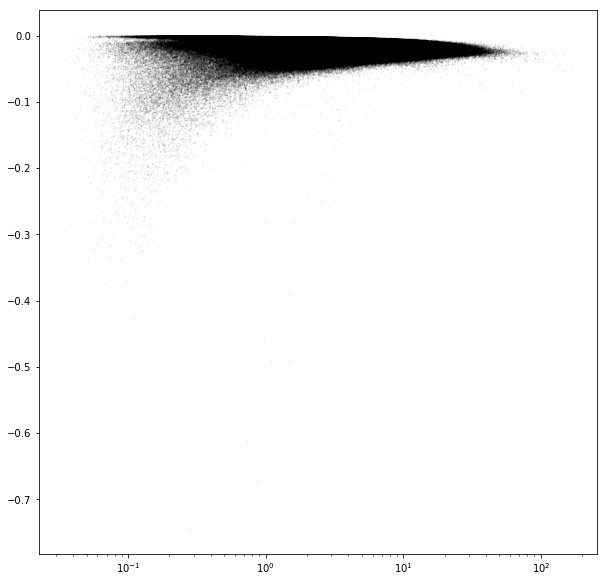

In [92]:
xi = np.linspace(np.min(x), np.max(x), 100)
yi = xi**-0.5

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x, y - x**(-0.5), s=1, facecolor="k", alpha=0.05)
ax.semilogx()
